## Upvote predicition 

A model will be created to predict the number of upvote a post will be getting based on various features. The features are ID(ID of the post), Tag(type of question asked), Reputation(reputation of Author), Answer(given by people), Username, and views.


The process will consist of:

    1.Missing Values

    2.Numerical Data

    3.Categorical Data

    4.Feature Scaling

    5.Model Creation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_df = pd.read_csv('train_NIR5Yl1.csv')
raw_df

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


## Missing Values

In [3]:
raw_df.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

Dataset doesn't contain any missing values

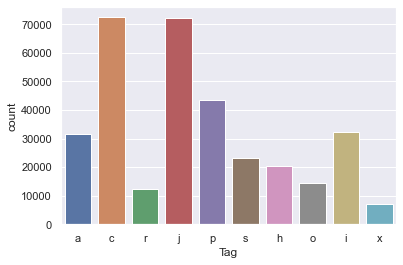

In [4]:
df = raw_df.copy()
sns.countplot(df['Tag'])

In [5]:
#drop ID
df = df.drop(df[['ID', 'Username']], axis = 1)

Since every row have a unique value, it's not correlated with the target feature

In [6]:
df

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0
...,...,...,...,...,...
330040,c,36.0,2.0,1063.0,0.0
330041,c,1649.0,2.0,23319.0,73.0
330042,c,6178.0,2.0,2453.0,15.0
330043,j,89.0,2.0,2107.0,3.0


## Numerical Data

In [7]:
num_ft = [feature for feature in df.columns if df[feature].dtype!='O' and feature != 'Upvotes']
num_ft

['Reputation', 'Answers', 'Views']

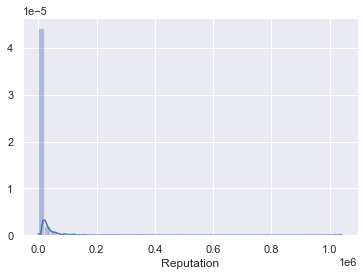

In [8]:
sns.distplot(df['Reputation'])

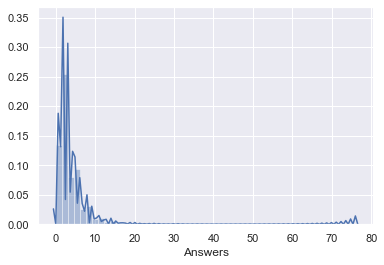

In [9]:
sns.distplot(df['Answers'])

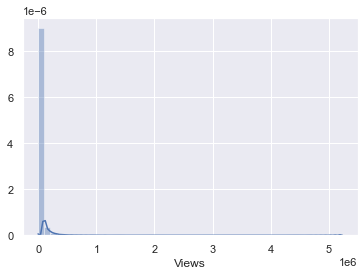

In [10]:
sns.distplot(df['Views'])

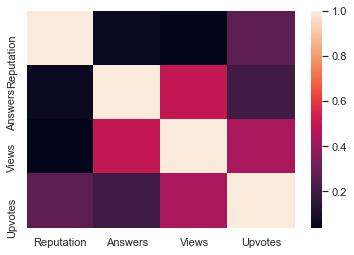

In [11]:
sns.heatmap(df.corr())

In [12]:
df

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0
...,...,...,...,...,...
330040,c,36.0,2.0,1063.0,0.0
330041,c,1649.0,2.0,23319.0,73.0
330042,c,6178.0,2.0,2453.0,15.0
330043,j,89.0,2.0,2107.0,3.0


## Catagorical Data

In [13]:
##Label transform Tag feature
from sklearn.preprocessing import LabelEncoder
df['Tag'] = LabelEncoder.fit_transform(df,df['Tag'])
df

C:\Users\omari\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:256: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.classes_, y = _encode(y, encode=True)


,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0
...,...,...,...,...,...
330040,1,36.0,2.0,1063.0,0.0
330041,1,1649.0,2.0,23319.0,73.0
330042,1,6178.0,2.0,2453.0,15.0
330043,4,89.0,2.0,2107.0,3.0


## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
data = df.copy()
scale = StandardScaler().fit(data[['Views']])
data['Views'] = scale.transform(data[['Views']])

In [15]:
scale = StandardScaler().fit(data[['Reputation']])
data['Reputation'] = scale.transform(data[['Reputation']])

scale = StandardScaler().fit(data[['Answers']])
data['Answers'] = scale.transform(data[['Answers']])

In [16]:
data

,Tag,Reputation,Answers,Views,Upvotes
0,0,-0.141573,-0.535736,-0.269158,42.0
1,0,0.675238,2.257943,0.323087,1175.0
2,1,-0.237059,0.023000,-0.266540,60.0
3,0,-0.277486,-0.256368,-0.031882,9.0
4,1,-0.129415,0.023000,-0.193426,83.0
...,...,...,...,...,...
330040,1,-0.285911,-0.535736,-0.353055,0.0
330041,1,-0.226306,-0.535736,-0.078142,73.0
330042,1,-0.058946,-0.535736,-0.335886,15.0
330043,4,-0.283953,-0.535736,-0.340160,3.0


## Model

In [17]:
y = data['Upvotes']
X = data.drop('Upvotes', axis = 1)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=0)

In [19]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(264036, 4) (264036,) (66009, 4) (66009,)


In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [21]:
reg.score(x_train,y_train)

0.2485170770251336

In [22]:
reg.score(x_test,y_test)

0.30395436375875207

In [23]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
regr.score(x_train,y_train)

0.982405404580892

In [33]:
regr.score(x_test,y_test)

0.9119898172161455